In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import Data
df=pd.read_excel('Super_Store_Data.xlsx')

In [3]:
df.shape

(1952, 25)

In [4]:
#Know About Data and its Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [5]:
#Find Null Values............
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
# Fill Null values.............
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

In [7]:
# Show First Three Data..................
df.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192


In [8]:
# Count Of Order Priority...........
df['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [9]:
# show the Order Priprity of Unique Data
df['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

In [10]:
# Replace The Data..........
df['Order Priority']=df['Order Priority'].replace('Critical ','Critical')

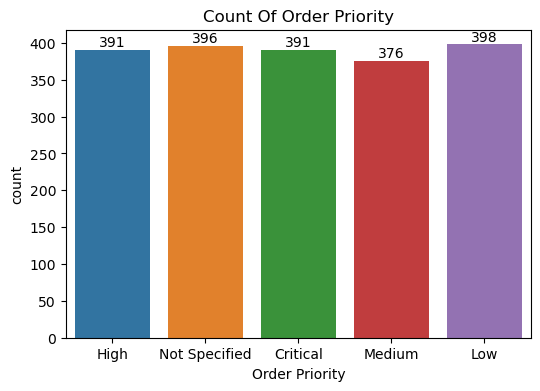

In [11]:
#Count Of Order Priority 
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Order Priority',data=df)
plt.title("Count Of Order Priority")
plt.savefig("Count of Order Pririty.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

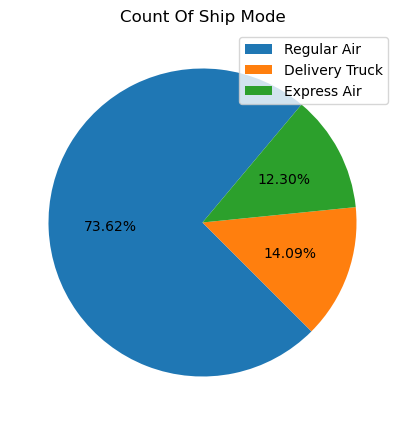

In [12]:
#Analssis Of Based on the Shipping Mode OF Orders
plt.figure(figsize=(5,5))
x=df['Ship Mode'].value_counts().index
y=df['Ship Mode'].value_counts().values
plt.pie(y,data=df,startangle=50,autopct='%0.02f%%')
plt.title("Count Of Ship Mode")
plt.legend(loc=1,labels=x)
plt.savefig("Ship Mode Percentage.jpg")
plt.show()

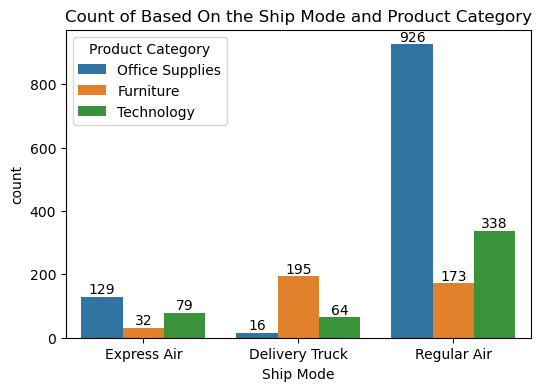

In [13]:
# Analysis Based On the Ship Mode and Product Category
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Ship Mode',data=df,hue='Product Category')
plt.title("Count of Based On the Ship Mode and Product Category")
plt.savefig("Count of pc and sm.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

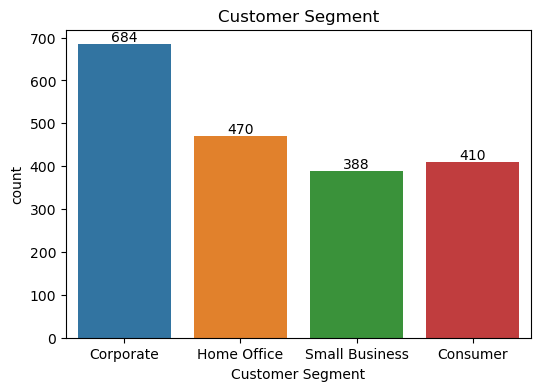

In [14]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Customer Segment',data=df)
plt.title("Customer Segment")
plt.savefig("Coustomer Segment.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

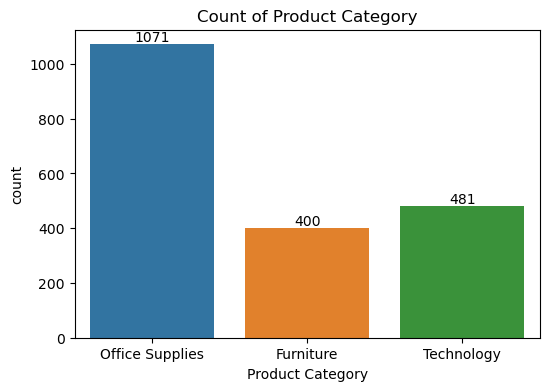

In [15]:
#Count Of Product Category....
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Product Category',data=df)
plt.title('Count of Product Category')
plt.savefig("product category.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

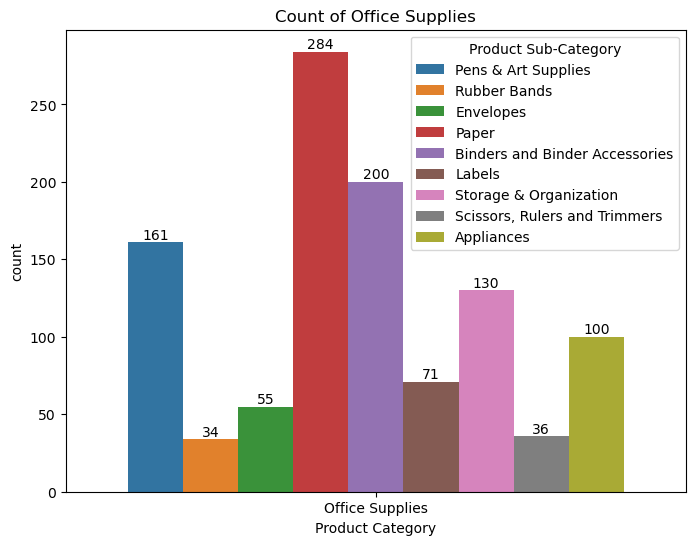

In [16]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Product Category',data=df[df['Product Category']=="Office Supplies"],hue='Product Sub-Category')
plt.title("Count of Office Supplies")
plt.savefig("Office Supplies.jpg")
for bar in ax.containers:
    ax.bar_label(bar)


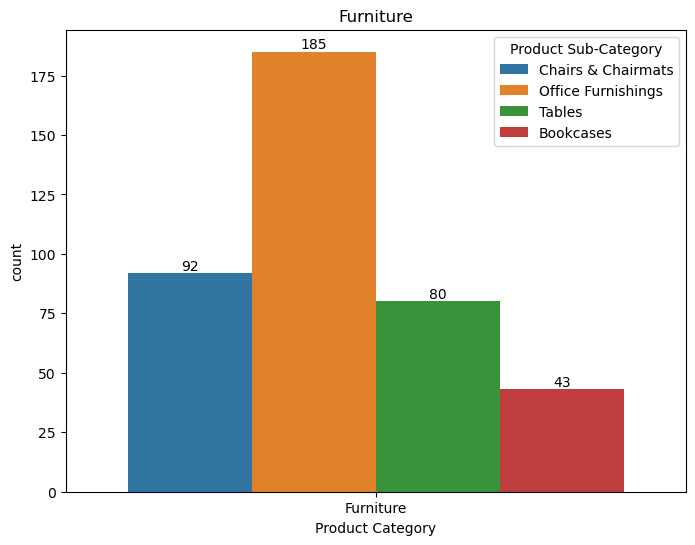

In [17]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Product Category",data=df[df["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.title("Furniture")
plt.savefig("Furniture.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

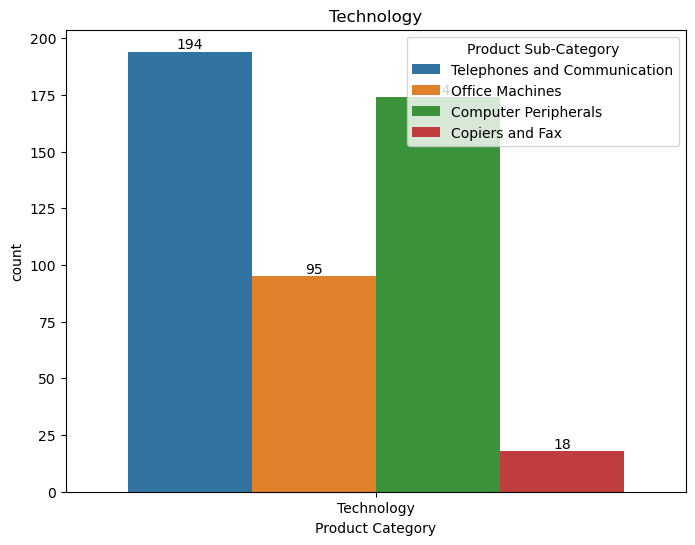

In [18]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Product Category",data=df[df["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.title("Technology")
plt.savefig("Technology.jpg")
for bar in ax.containers:
    ax.bar_label(bar)

In [19]:
#Find Counts Of Sales Year Wise
df['Order Year']=df['Order Date'].dt.year
df['Order Year'].value_counts()

Order Year
2015    1952
Name: count, dtype: int64

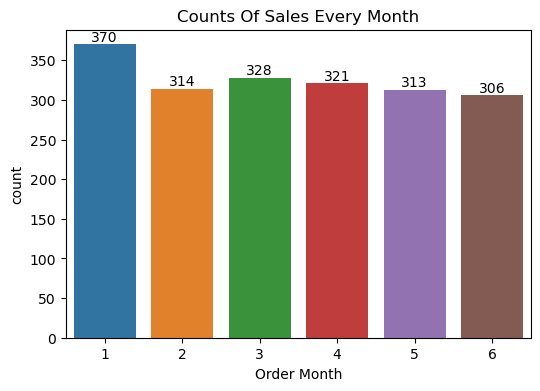

In [20]:
#Counts Of Sales Month Wise
plt.figure(figsize=(6,4))
df['Order Month']=df['Order Date'].dt.month
ax=sns.countplot(x="Order Month",data=df)
plt.savefig("Month Wise Sales")
plt.title("Counts Of Sales Every Month")
for bar in ax.containers:
    ax.bar_label(bar)

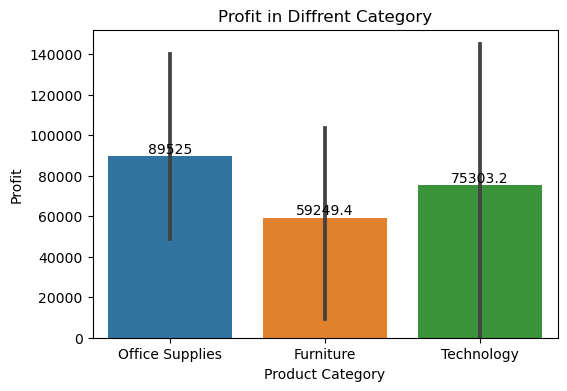

In [21]:
#Profit In Diffrent Product Category
plt.figure(figsize=(6,4))
ax=sns.barplot(x="Product Category",y="Profit",data=df,estimator="sum")
plt.title("Profit in Diffrent Category")
plt.savefig("Profit in Diffrent Product Category")
for bar in ax.containers:
    ax.bar_label(bar)

In [22]:
df['State or Province'].value_counts()[:5]

State or Province
California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: count, dtype: int64

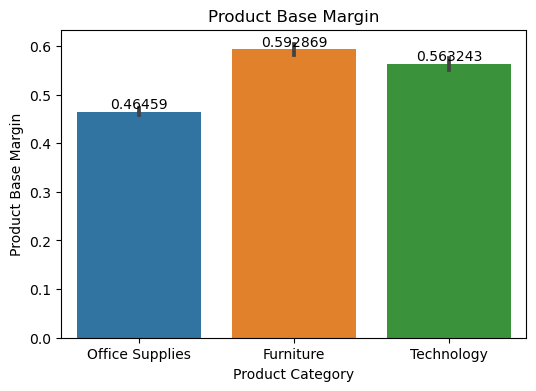

In [26]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x="Product Category",y="Product Base Margin",data=df)
plt.title("Product Base Margin")
for bar in ax.containers:
    ax.bar_label(bar)